In [1]:
import pandas as pd
import numpy as np
import seaborn as se
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from collections import OrderedDict

In [2]:
#path = r"C:\Users\Giorgio\Documents\Data Science\ADM\HW2\Data"

pl = pd.read_json("../data/matches_England.json")
df = pd.DataFrame(pl, columns = ['gameweek','label'])
print(df)
df.sort_values(by = ['gameweek'], inplace = True)
df.reset_index(drop = True, inplace = True)
df

     gameweek                                          label
0          38               Burnley - AFC Bournemouth, 1 - 2
1          38   Crystal Palace - West Bromwich Albion, 2 - 0
2          38             Huddersfield Town - Arsenal, 0 - 1
3          38      Liverpool - Brighton & Hove Albion, 4 - 0
4          38             Manchester United - Watford, 1 - 0
..        ...                                            ...
375         1                    Everton - Stoke City, 1 - 0
376         1              Southampton - Swansea City, 0 - 0
377         1  West Bromwich Albion - AFC Bournemouth, 1 - 0
378         1                     Watford - Liverpool, 3 - 3
379         1                Arsenal - Leicester City, 4 - 3

[380 rows x 2 columns]


,gameweek,label
0,1,"Arsenal - Leicester City, 4 - 3"
1,1,"Manchester United - West Ham United, 4 - 0"
2,1,"Newcastle United - Tottenham Hotspur, 0 - 2"
3,1,"Brighton & Hove Albion - Manchester City, 0 - 2"
4,1,"Chelsea - Burnley, 2 - 3"
...,...,...
375,38,"Southampton - Manchester City, 0 - 1"
376,38,"Swansea City - Stoke City, 1 - 2"
377,38,"West Ham United - Everton, 3 - 1"
378,38,"Newcastle United - Chelsea, 3 - 0"


In [3]:
df['team1'] = ''
df['team2'] = ''
df['score1'] = 0
df['score2'] = 0

In [4]:
for i in range(len(df)):
    df['team1'][i] = ((df['label'][i].replace(',', '-')).split('-'))[0].strip()
    df['team2'][i] = ((df['label'][i].replace(',', '-')).split('-'))[1].strip()
    p1 = ((df['label'][i].replace(',', '-')).split('-'))[2].strip()
    p2 = ((df['label'][i].replace(',', '-')).split('-'))[3].strip()
    if(int(p1) > int(p2)):
        df['score1'][i] +=  3
    elif(int(p1) == int(p2)):
        df['score1'][i] += 1
        df['score2'][i] += 1
    else:
        df['score2'][i] += 3


/home/spelvio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/spelvio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/spelvio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [5]:
df.iloc[[1]]

,gameweek,label,team1,team2,score1,score2
1,1,"Manchester United - West Ham United, 4 - 0",Manchester United,West Ham United,3,0


In [6]:
ars = pd.DataFrame(columns = ['gameweek', 'label', 'team1', 'team2', 'score1', 'score2'])
for i in range(len(df)):
    if bool(df.team1[i] == 'Arsenal' or df.team2[i] == 'Arsenal'):
        ars = ars.append(df.iloc[[i]])
ars

,gameweek,label,team1,team2,score1,score2
0,1,"Arsenal - Leicester City, 4 - 3",Arsenal,Leicester City,3,0
13,2,"Stoke City - Arsenal, 1 - 0",Stoke City,Arsenal,3,0
20,3,"Liverpool - Arsenal, 4 - 0",Liverpool,Arsenal,3,0
39,4,"Arsenal - AFC Bournemouth, 3 - 0",Arsenal,AFC Bournemouth,3,0
41,5,"Chelsea - Arsenal, 0 - 0",Chelsea,Arsenal,1,1
51,6,"Arsenal - West Bromwich Albion, 2 - 0",Arsenal,West Bromwich Albion,3,0
66,7,"Arsenal - Brighton & Hove Albion, 2 - 0",Arsenal,Brighton & Hove Albion,3,0
70,8,"Watford - Arsenal, 2 - 1",Watford,Arsenal,3,0
81,9,"Everton - Arsenal, 2 - 5",Everton,Arsenal,0,3
94,10,"Arsenal - Swansea City, 2 - 1",Arsenal,Swansea City,3,0


In [7]:
d = {}
for i in range(len(df)):
    if df.team1[i] not in d:
        d[df.team1[i]] = [int(df.score1[df.gameweek[i]+1]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team1[i]][df.gameweek[i]-1] += df.score1[i] + d[df.team1[i]][df.gameweek[i]-2]
    if df.team2[i] not in d:
        d[df.team2[i]] = [int(df.score2[df.gameweek[i]+1]),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    else:
        d[df.team2[i]][df.gameweek[i]-1] += df.score2[i] + d[df.team2[i]][df.gameweek[i]-2]
for elem in d:
    print(elem, d[elem])

Arsenal [0, 0, 0, 3, 4, 7, 10, 10, 13, 16, 16, 19, 22, 25, 25, 26, 27, 30, 31, 34, 35, 36, 36, 39, 39, 42, 42, 42, 42, 45, 45, 48, 51, 51, 54, 54, 57, 60]
Leicester City [3, 6, 6, 6, 7, 7, 8, 9, 12, 15, 16, 16, 17, 20, 23, 26, 29, 29, 30, 30, 30, 33, 34, 37, 37, 38, 38, 39, 40, 43, 46, 49, 49, 49, 50, 50, 50, 50]
Manchester United [0, 3, 6, 7, 10, 13, 16, 17, 17, 20, 20, 23, 26, 29, 32, 32, 35, 38, 39, 40, 41, 44, 47, 50, 50, 53, 53, 56, 59, 62, 63, 66, 69, 69, 72, 75, 75, 78]
West Ham United [3, 3, 3, 6, 7, 7, 10, 11, 11, 12, 12, 12, 13, 13, 13, 16, 17, 20, 20, 21, 22, 25, 28, 29, 30, 30, 33, 33, 33, 33, 34, 37, 38, 39, 39, 39, 42, 45]
Newcastle United [0, 0, 3, 6, 9, 9, 10, 11, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 18, 18, 19, 22, 23, 23, 24, 25, 28, 29, 29, 32, 32, 35, 38, 41, 41, 41, 41, 44]
Tottenham Hotspur [3, 3, 4, 7, 8, 11, 14, 17, 20, 20, 23, 23, 24, 24, 25, 28, 31, 31, 34, 37, 38, 41, 44, 45, 48, 49, 52, 55, 58, 61, 64, 67, 70, 70, 71, 74, 74, 77]
Brighton & Hove Albion [0

In [8]:
allsquad = pd.DataFrame(d)
allsquad.index = np.arange(1, len(allsquad)+1)
allsquad

,Arsenal,Leicester City,Manchester United,West Ham United,Newcastle United,Tottenham Hotspur,Brighton & Hove Albion,Manchester City,Chelsea,Burnley,Watford,Liverpool,Everton,Stoke City,Southampton,Swansea City,West Bromwich Albion,AFC Bournemouth,Crystal Palace,Huddersfield Town
1,0,3,0,3,0,3,0,3,0,3,0,3,0,3,0,3,0,3,0,3
2,0,6,3,3,0,3,0,4,3,3,3,6,1,6,3,3,3,3,0,6
3,0,6,6,3,3,4,1,7,6,4,4,9,1,7,4,6,4,3,0,7
4,3,6,7,6,6,7,4,10,9,7,7,9,1,8,4,6,4,3,0,7
5,4,7,10,7,9,8,4,13,10,8,7,10,1,8,7,7,5,6,0,8
6,7,7,13,7,9,11,7,16,13,9,10,13,4,8,7,7,5,6,0,9
7,10,8,16,10,10,14,7,19,13,12,11,14,4,11,7,7,6,7,0,9
8,10,9,17,11,11,17,8,22,13,13,14,15,5,11,8,10,7,7,3,9
9,13,12,17,11,14,20,11,25,16,13,14,15,5,11,11,10,7,10,3,12
10,16,15,20,12,14,20,12,28,19,16,14,18,5,14,12,10,7,10,4,12


In [10]:
streak = OrderedDict()
for elem in d:
    if elem not in streak:
        streak[elem] = [0, 0]   # [win, lose] streak
    current_win = 1
    current_lose = 1
    max_win = 1
    max_lose = 1
    for i in range(1, len(d[elem])):
        if d[elem][i] == d[elem][i-1] + 3:
            current_win += 1
            if current_lose >= max_lose:
                max_lose = current_lose
            current_lose = 0
        elif d[elem][i] == d[elem][i-1]:
            current_lose += 1
            if current_win >= max_win:
                max_win = current_win
            current_win = 0
        else:
            if current_lose >= max_lose:
                max_lose = current_lose
            current_lose = 0
            if current_win >= max_win:
                max_win = current_win
            current_win = 0
        streak[elem][0] = max_win
        streak[elem][1] = max_lose
win_ord = OrderedDict(sorted(streak.items(), key=lambda x:x[1][0]))   # sort by win streak
winner1 = list(win_ord)[-1]
winner2 = list(win_ord)[-2]
lose_ord = OrderedDict(sorted(streak.items(), key=lambda x:x[1][1]))   # sort by win streak
loser1 = list(lose_ord)[-1]
loser2 = list(lose_ord)[-2]

#debug
for elem in streak:
    print(elem, streak[elem])

print(winner1, winner2)
print(loser1, loser2)   

Arsenal [3, 3]
Leicester City [4, 2]
Manchester United [4, 1]
West Ham United [2, 3]
Newcastle United [3, 4]
Tottenham Hotspur [7, 2]
Brighton & Hove Albion [2, 3]
Manchester City [18, 1]
Chelsea [4, 2]
Burnley [3, 3]
Watford [2, 4]
Liverpool [4, 1]
Everton [2, 3]
Stoke City [2, 4]
Southampton [2, 3]
Swansea City [2, 4]
West Bromwich Albion [2, 8]
AFC Bournemouth [2, 4]
Crystal Palace [2, 7]
Huddersfield Town [2, 5]
Manchester City Tottenham Hotspur
West Bromwich Albion Crystal Palace


In [11]:
allsquad[winner1]

1       3
2       4
3       7
4      10
5      13
6      16
7      19
8      22
9      25
10     28
11     31
12     34
13     37
14     40
15     43
16     46
17     49
18     52
19     55
20     58
21     59
22     62
23     62
24     65
25     68
26     69
27     72
28     75
29     78
30     81
31     84
32     87
33     87
34     90
35     93
36     96
37     97
38    100
Name: Manchester City, dtype: int64

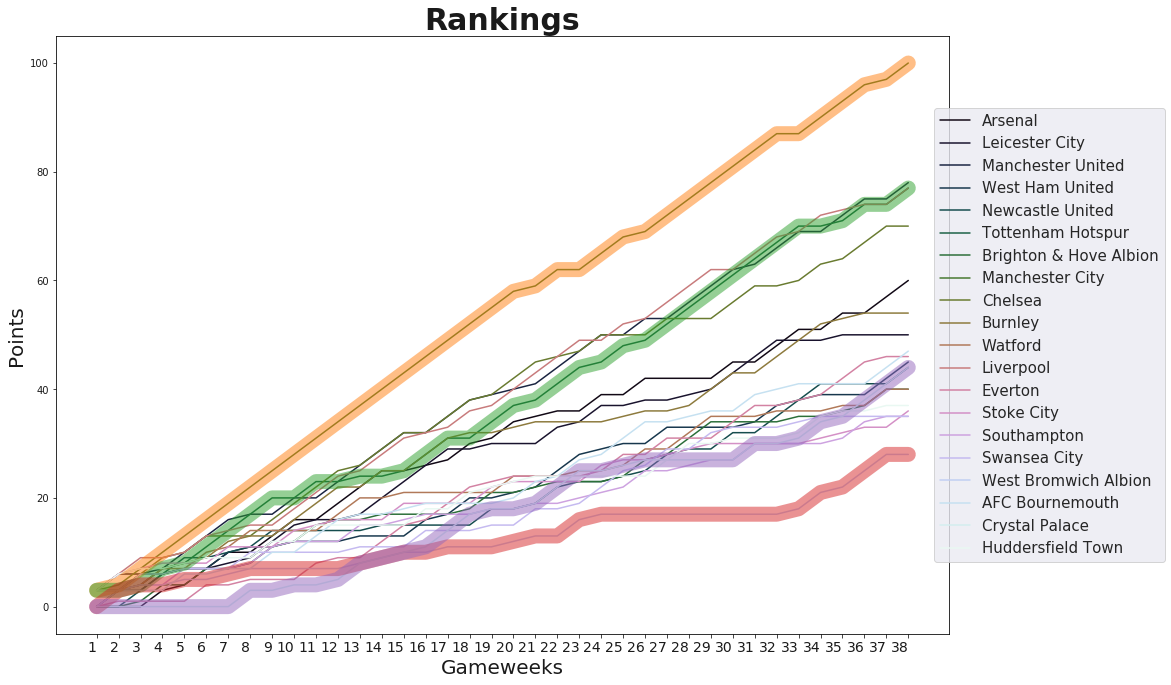

In [12]:
fig, ax = plt.subplots()
se.set(font_scale = 1.5)
fig.set_size_inches(16, 11)
ax.xaxis.grid(False)
ax.set_xticks(list(range(1, 39))) 
ax.set_xticklabels(list(range(1, 39)), fontsize = 14, horizontalalignment='right')
ax.axes.set_title("Rankings", fontsize = 30, fontweight="bold")
ax.set_xlabel("Gameweeks",fontsize = 20)
ax.set_ylabel("Points",fontsize = 20)
x = se.lineplot(data = allsquad, hue = allsquad.columns, ax = ax, legend = 'full', palette = 'cubehelix', style = 'choice', 
                dashes = False, size = 'coherence', sizes=(.25, 2.5))
x.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize = 15)
# ax.set_xticks([float(n)+0.5 for n in ax.get_xticks()])
plt.plot(allsquad[winner1], marker = '', linewidth = 15, alpha = 0.5)
plt.plot(allsquad[winner2], marker = '', linewidth = 15, alpha=0.5)
plt.plot(allsquad[loser1], marker = '', linewidth = 15, alpha=0.5)
plt.plot(allsquad[loser2], marker = '', linewidth = 15, alpha=0.5)
plt.show(x)